In [1]:
from collections import OrderedDict
import datetime
import time

import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import UnivariateSpline, InterpolatedUnivariateSpline

%matplotlib inline

DATA = 'data.txt'
GOAL = 100000
STEP = 500

//anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
//anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [5]:
dates = OrderedDict() # seems required got get right plot!
with open(DATA) as f:
    for line in f.readlines():
        dt, count = line.rstrip().split(':')
        dt = datetime.datetime.strptime(dt, "%Y%m%d%H%M%S")
        dates[dt] = count

In [3]:
def from_unix(x):
    try: 
        return datetime.datetime.fromtimestamp(int(x))
    except: # can get NAN I found out
        return 0
    
def to_unix(x): 
    try:
        return int(time.mktime(x.timetuple()))
    except:
        return 0

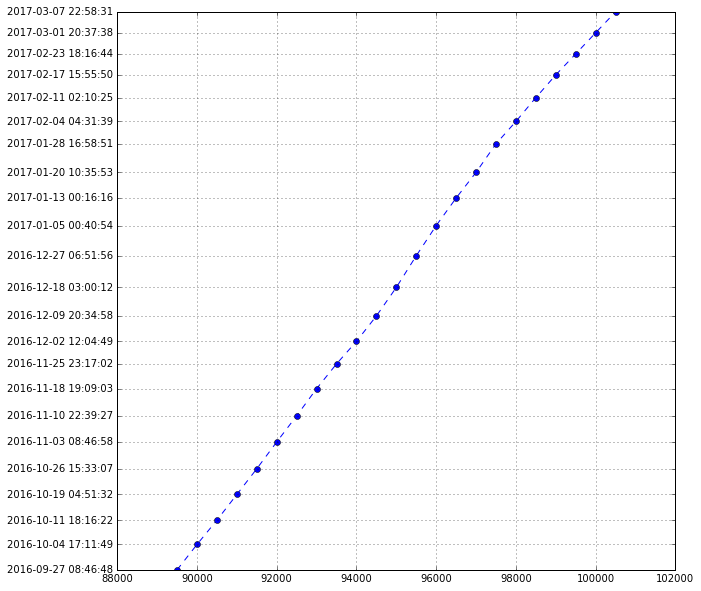

In [4]:
# given values
xi = list(dates.values())
yi = list(dates.keys())
y_unix = [to_unix(dt) for dt in yi] 

start_x = int(min(xi))//STEP*STEP

# positions to inter/extrapolate
x = np.arange(start_x, GOAL + 2*STEP, STEP)
order = 1 # linear

s = UnivariateSpline(xi, y_unix, k=1) # InterpolatedUnivariateSpline gives the same
y = s(x)

plt.figure()
fig = plt.gcf()
fig.set_size_inches(10, 10)

plt.grid(True)
y_readable = [from_unix(dt) for dt in y]
plt.yticks(y, y_readable)
plt.plot(x, y, linestyle='--', marker='o', color='b')